In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('data.tsv', delimiter='\t', nrows=1000)
data.head()

id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...

In [3]:
data = data.drop('id', axis=1)
data.head()

sentiment                                             review
0          1  With all this stuff going down at the moment w...
1          1  \The Classic War of the Worlds\" by Timothy Hi...
2          0  The film starts with a manager (Nicholas Bell)...
3          0  It must be assumed that those who praised this...
4          1  Superbly trashy and wondrously unpretentious 8...

In [4]:
# First line before clean
print('Sample review before clean:\n')
print(data['review'][9])

Sample review before clean:

<br /><br />This movie is full of references. Like \Mad Max II\", \"The wild one\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."


In [5]:
# Clean function
def clean(text):
    # Remove html tags
    no_html = BeautifulSoup(text).get_text()

    # Convert to lowercase
    lower = no_html.lower()

    # Replace anything that is not a letter to a space, ignore case
    only_alphabet = re.sub('[^a-z]', ' ', lower)

    # Remove excessive spaces
    return re.sub('\s+', ' ', only_alphabet).strip()

In [6]:
# Clean review column
data['review'] = data['review'].apply(clean)

print('Cleaned data:')
data.head()

Cleaned data:


sentiment                                             review
0          1  with all this stuff going down at the moment w...
1          1  the classic war of the worlds by timothy hines...
2          0  the film starts with a manager nicholas bell g...
3          0  it must be assumed that those who praised this...
4          1  superbly trashy and wondrously unpretentious s...

In [7]:
print('Sample review after clean:\n')
print(data['review'][9])

Sample review after clean:

this movie is full of references like mad max ii the wild one and many others the ladybug s face it s a clear reference or tribute to peter lorre this movie is a masterpiece we ll talk much more about in the future


In [8]:
# Use review column as features
X = data['review']

# Use sentiment column as target
y = data['sentiment']

# Split data into 75% for training, 25%% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750,)
(250,)
(750,)
(250,)


In [9]:
# Instantiate Count Vectorizer
cv = CountVectorizer()

# Learns vocabulary from training data
cv.fit(X_train)

# Create bag of words from training data using learned vocabulary
X_train_bow = cv.transform(X_train)

print('Bag of Words from training data:')
pd.DataFrame(X_train_bow.toarray(), columns=cv.get_feature_names_out())

Bag of Words from training data:


aag  abandon  abandoned  abandoning  abbey  abbott  abc  abdicating  \
0      0        0          0           0      0       0    0           0   
1      0        0          0           0      0       0    0           0   
2      0        0          0           0      0       0    0           0   
3      0        0          0           0      0       0    0           0   
4      0        0          0           0      0       0    0           0   
..   ...      ...        ...         ...    ...     ...  ...         ...   
745    0        0          0           0      0       0    0           0   
746    0        0          0           0      0       0    0           0   
747    0        0          0           0      0       0    0           0   
748    0        0          0           0      0       0    0           0   
749    0        0          0           0      0       0    0           0   

     abducted  abductee  ...  zoe  zombie  zombies  zone  zoom  zooms  zukhov  \
0           0         0  ...    0       0        0     0     0      0       0   
1           0         0  ...    0       0        0     0     0      0       0   
2           0         0  ...    0       0        0     0     0      0       0   
3           0         0  ...    0       0        0     0     0      0       0   
4           0         0  ...    0       0        0     0     0      0       0   
..        ...       ...  ...  ...     ...      ...   ...   ...    ...     ...   
745         0         0  ...    0       0        0     0     0      0       0   
746         0         0  ...    0       0        0     0     0      0       0   
747         0         0  ...    0       0        0     0     0      0       0   
748         0         0  ...    0       0        0     0     0      0       0   
749         0         0  ...    0       0        0     0     0      0       0   

     zulu  zuniga  zurich  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  
..    ...     ...     ...  
745     0       0       0  
746     0       0       0  
747     0       0       0  
748     0       0       0  
749     0       0       0  

[750 rows x 15676 columns]

In [10]:
# Instantiate Multinomial Naive Bayes model
nb = MultinomialNB()

# Train model with bag of words and sentiment from training data
nb.fit(X_train_bow, y_train)

MultinomialNB()

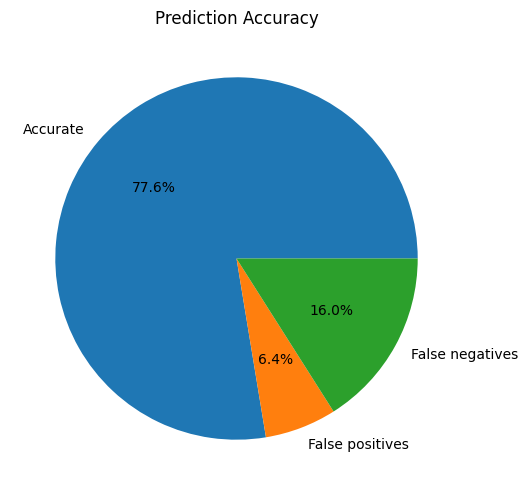

In [11]:
# Create bag of words from testing data using learned vocabulary
X_test_bow = cv.transform(X_test)

# Predict sentiment using trained model
y_test_predict = nb.predict(X_test_bow)

# Prediction accuracy pie chart
plt.figure(figsize=(6, 6))
plt.gcf().set_dpi(100)
plt.title('Prediction Accuracy')
plt.pie([
    len(X_test[y_test_predict == y_test]),
    len(X_test[y_test_predict > y_test]),
    len(X_test[y_test_predict < y_test])
], labels=[
    'Accurate',
    'False positives',
    'False negatives'
], autopct='%.1f%%')
plt.ylabel('')
plt.show()
